In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [2]:
ev = pd.read_csv('../data/mag/evictions.csv')

In [3]:
ev.columns

Index(['geoid', 'puma_lbl', 'e_19', 'e_20', 'e_21', 'e_22', 'e_m_19', 'e_m_20',
       'e_m_21', 'e_m_22', 'e_m_c_19', 'e_m_c_20', 'e_m_c_21', 'e_m_c_22'],
      dtype='object')

## Map prices

In [4]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
geo.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475..."
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874..."


In [6]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/PUMAS_mask.geojson')

### join data to geo files
# check 2020 / 2010 PUMA boundary

In [7]:
ev = pd.merge(geo,ev,how='left',left_on='joinid',right_on='geoid')

In [8]:
ev.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,geoid,puma_lbl,e_19,e_20,e_21,e_22,e_m_19,e_m_20,e_m_21,e_m_22,e_m_c_19,e_m_c_20,e_m_c_21,e_m_c_22
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,Phoenix (Far North) & Peoria (Northwest) Citie...,861,500,874,545,72,42,73,68,8,4,8,7
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,"Maricopa County--Scottsdale (North), Phoenix (...",636,339,422,314,53,28,35,39,4,2,3,3


In [9]:
ev.describe()

,ALAND20,AWATER20,joinid,geoid,e_19,e_20,e_21,e_22,e_m_19,e_m_20,e_m_21,e_m_22,e_m_c_19,e_m_c_20,e_m_c_21,e_m_c_22
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,2025.000000,1145.533333,1565.266667,1265.40000,168.800000,95.533333,130.466667,158.200000,10.466667,6.000000,7.666667,9.200000
std,1.990223e+08,9.764382e+05,5.235411,5.235411,975.290726,563.854448,787.234805,625.10294,81.324922,46.923748,65.550272,78.171241,4.955036,2.951997,2.794553,3.051931
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,626.000000,339.000000,422.000000,314.00000,52.000000,28.000000,35.000000,39.000000,4.000000,2.000000,3.000000,3.000000
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,1293.500000,660.000000,945.000000,852.50000,107.500000,55.000000,79.000000,106.500000,7.000000,4.000000,6.000000,7.500000
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,1926.000000,1053.000000,1484.000000,1152.00000,161.000000,88.000000,124.000000,144.000000,10.000000,5.000000,7.000000,9.000000
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,2700.000000,1644.500000,2132.500000,1608.00000,225.000000,137.000000,178.000000,201.000000,14.500000,8.000000,9.500000,12.000000
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,3679.000000,2028.000000,2955.000000,2355.00000,307.000000,169.000000,246.000000,294.000000,20.000000,12.000000,12.000000,13.000000


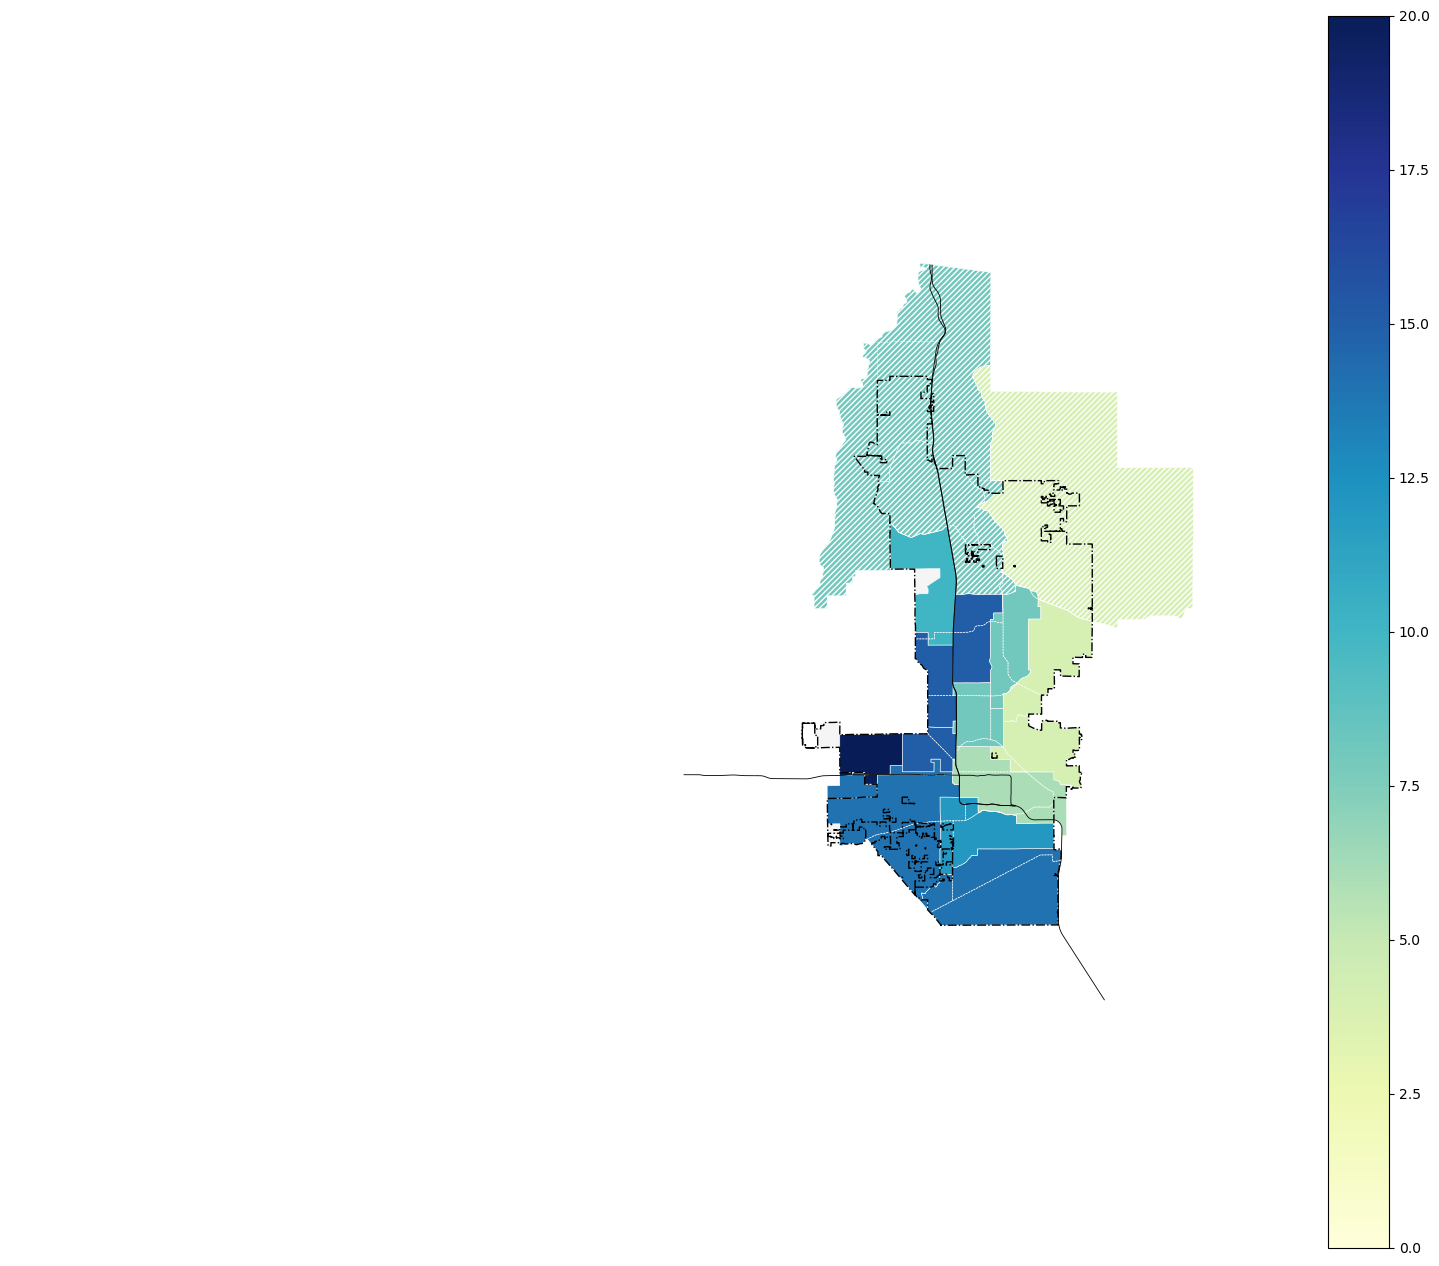

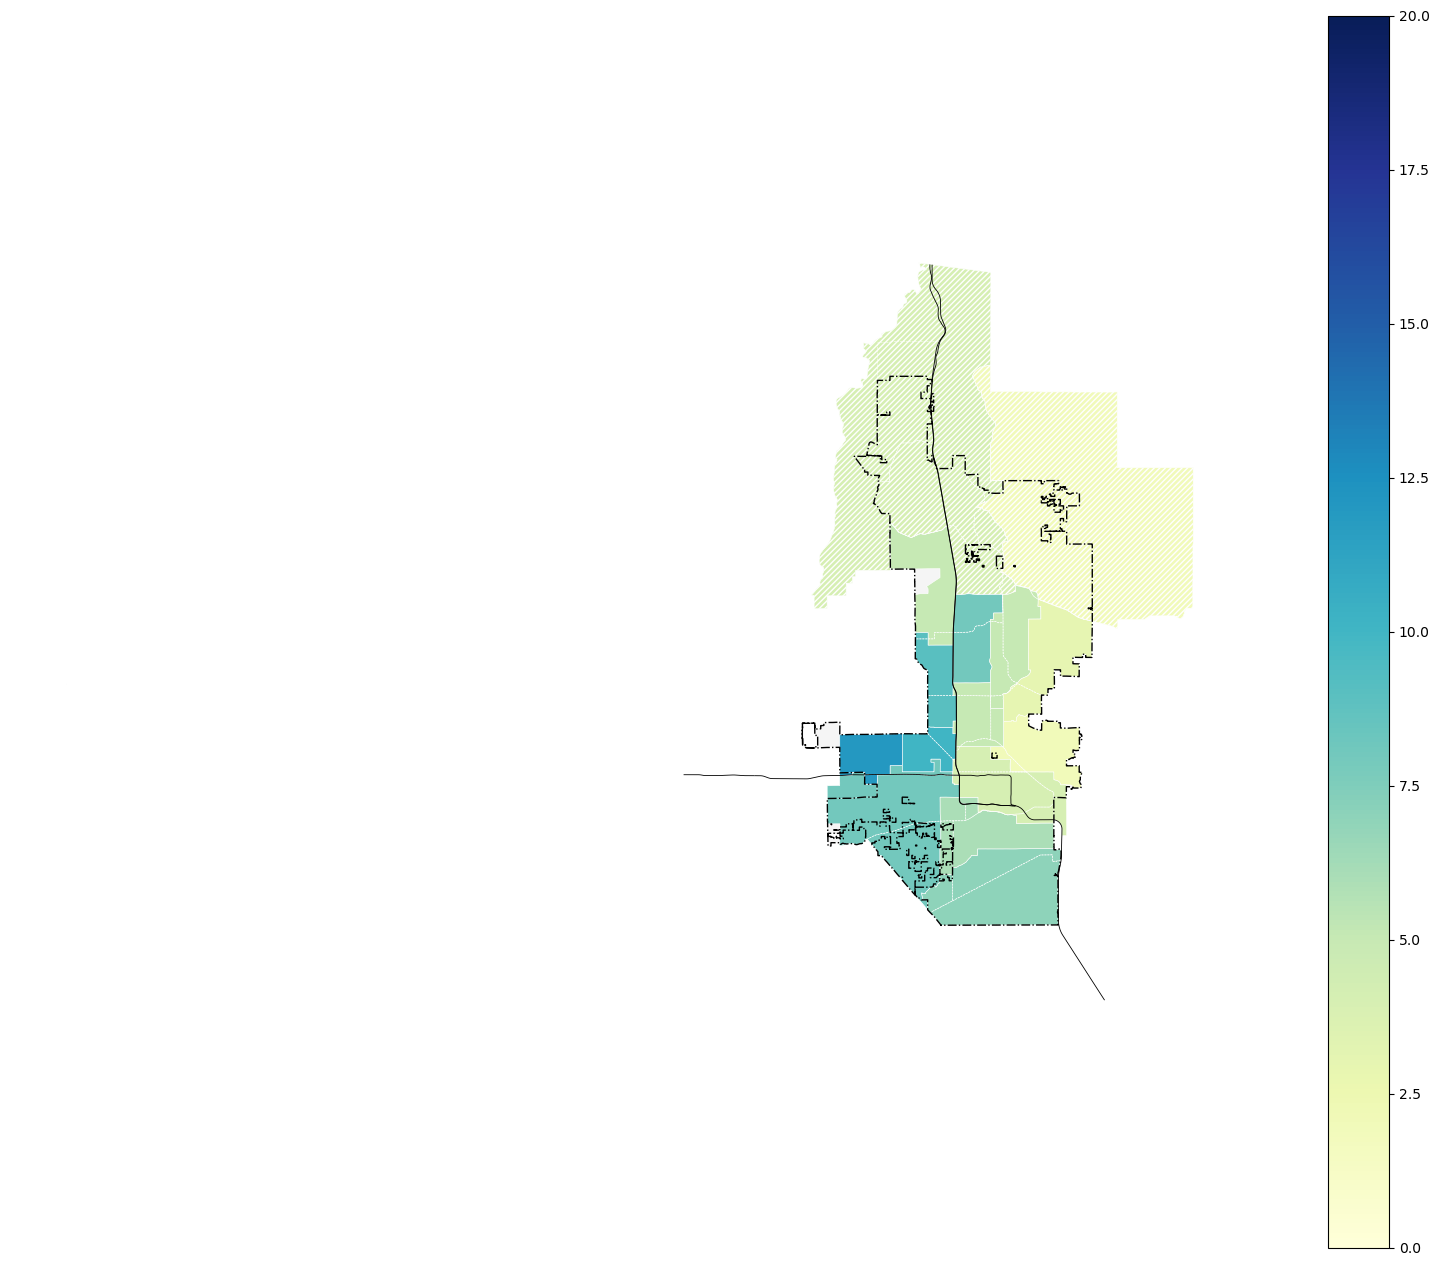

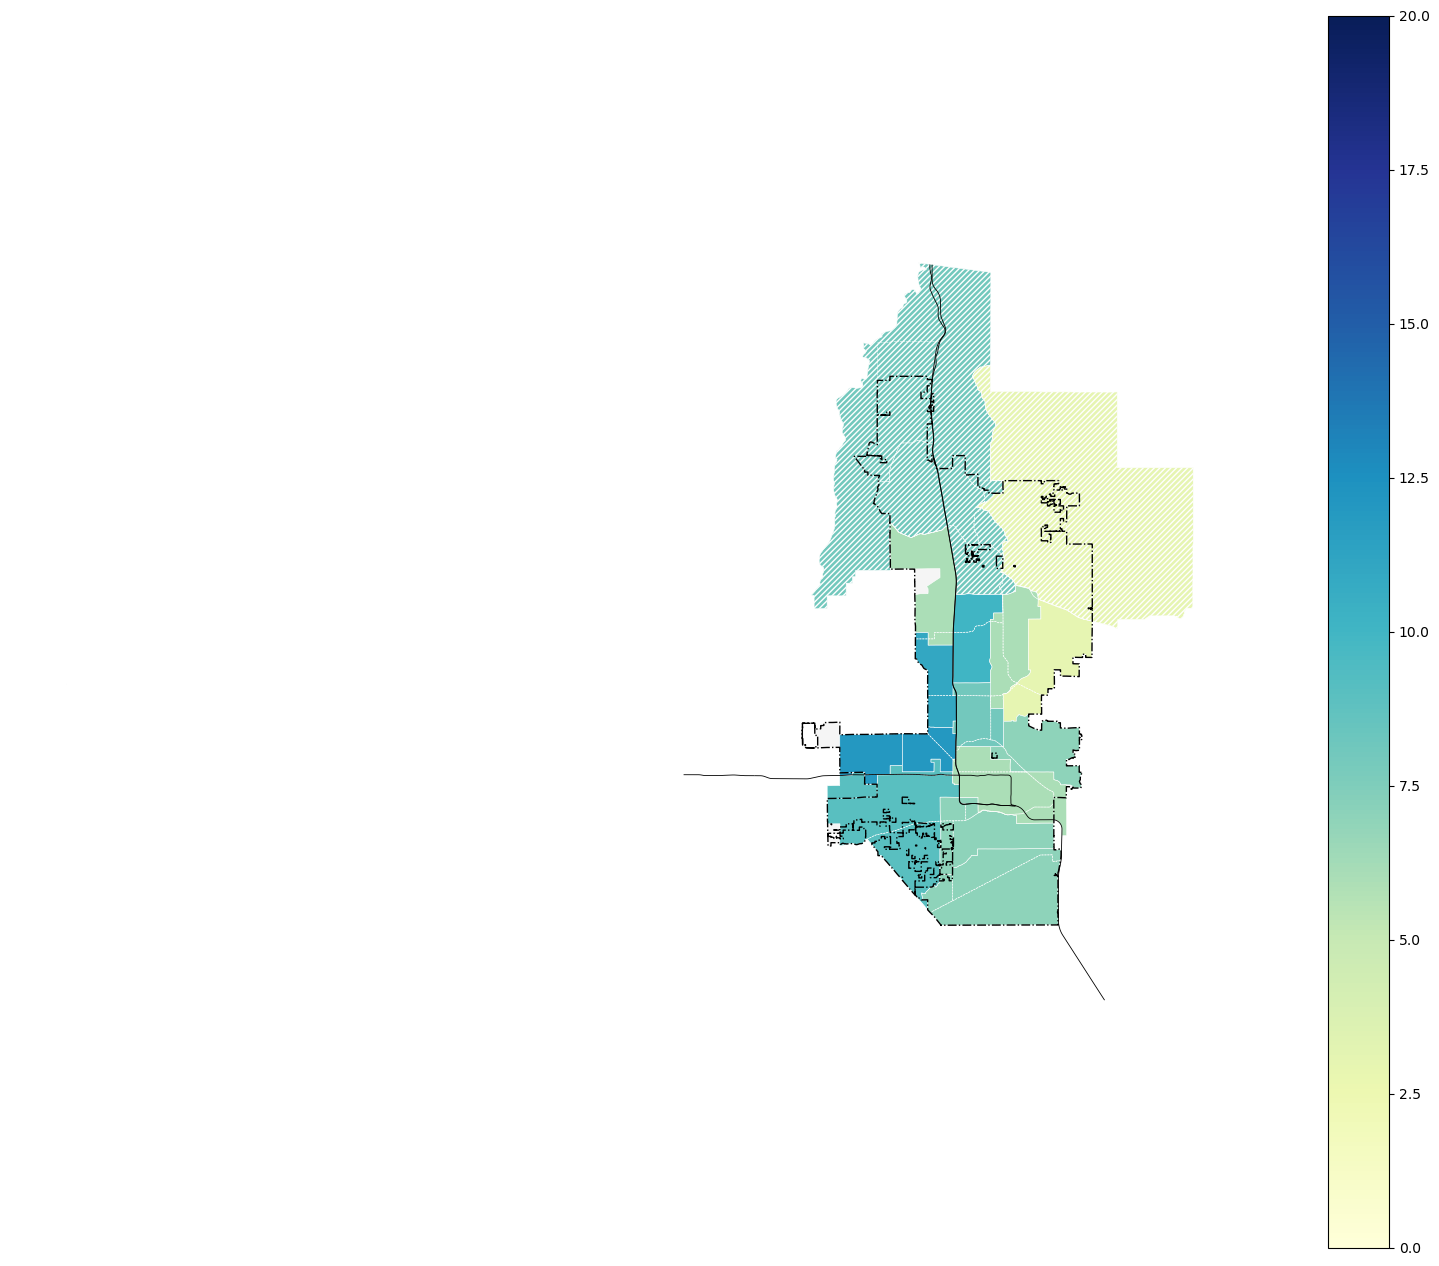

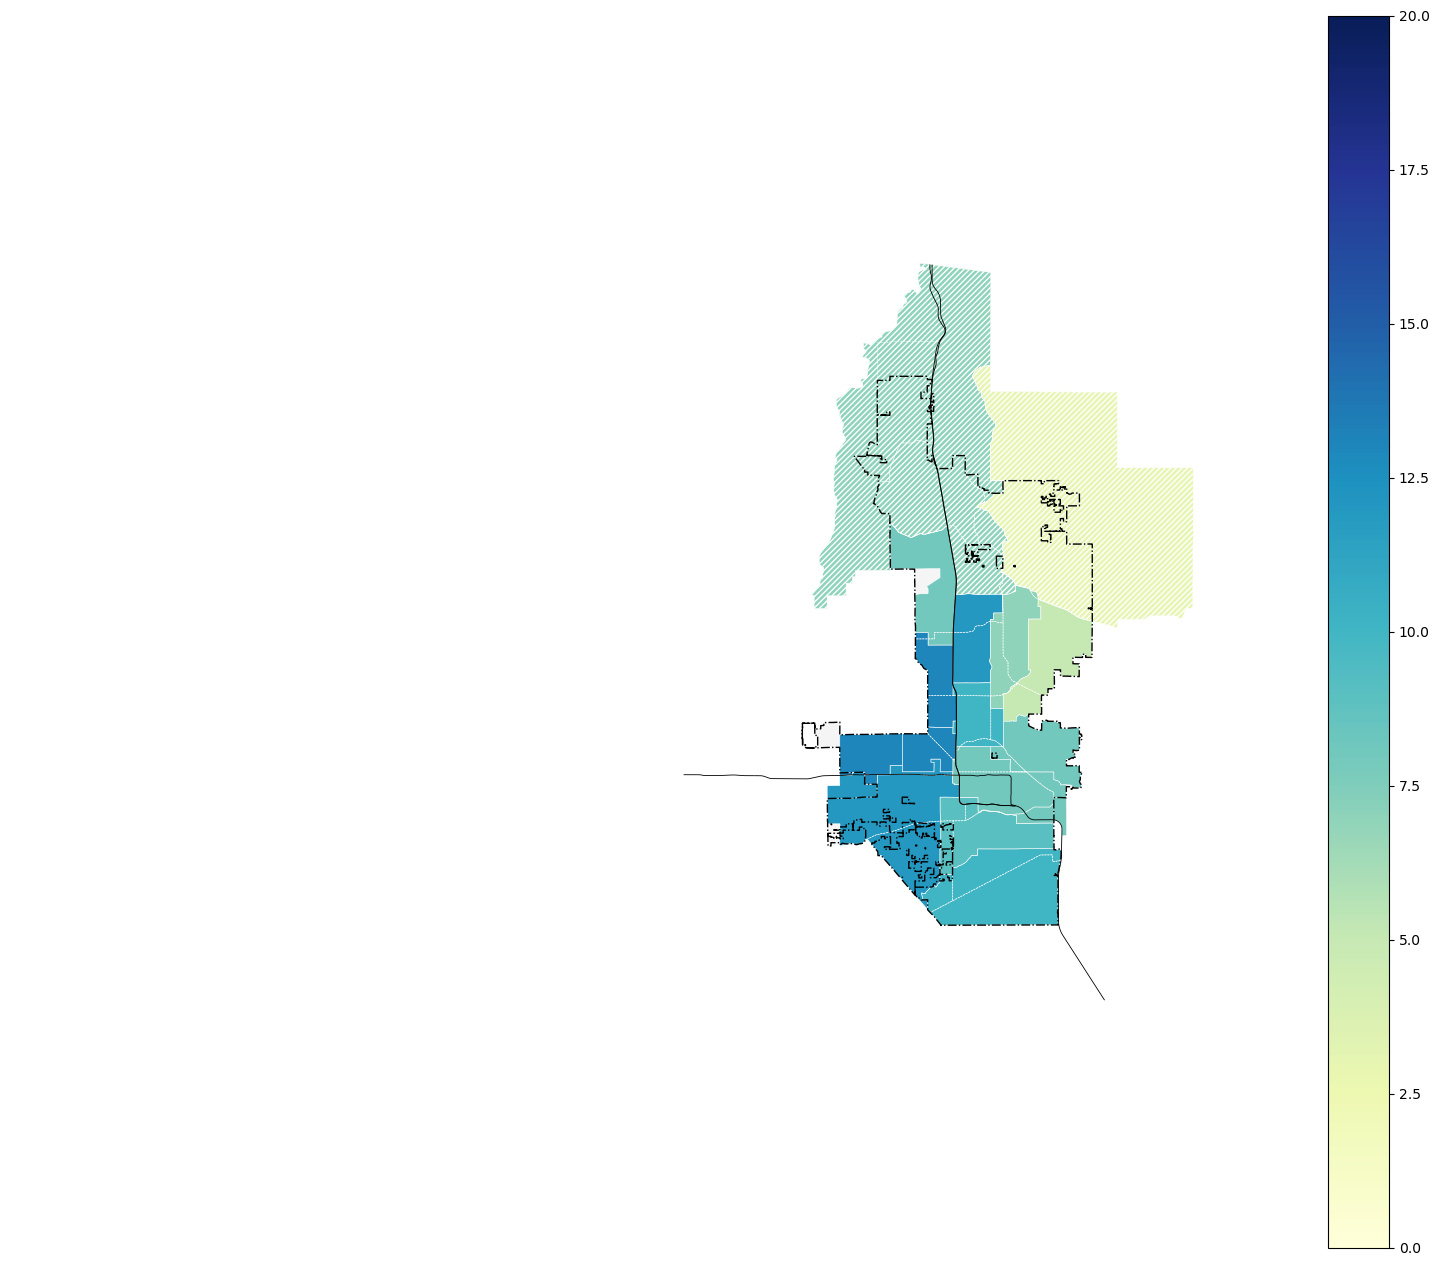

In [10]:
for yr in ['19','20','21','22']:  
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    new_norm = plt.Normalize(vmin=0,vmax=20)
    sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
    sm.set_array([])
    phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
    ev.plot(column = f'e_m_c_{yr}', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
    mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
    villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
    phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
    road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
    fig.colorbar(sm)
    plt.savefig(f'img/evic_820_permo_percap_{yr}.jpg', dpi = 300) # saving each plot